# ESD for Pytorch pretrained models
http://pytorch.org/docs/master/torchvision/models.html

INcluding reshaped convolutional layers

### C includes auto MP fits and mp soft ranks

In [12]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import powerlaw

import sklearn
from sklearn.decomposition import TruncatedSVD

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [13]:
import import_ipynb
import RMT_Util

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,5]

### Universality Classes:  Is this right ?

#### Truncated Power Law
$$\mu>2;\;\;\rho(\lambda)\sim\lambda^{-1-\mu}$$

$$\alpha=1+\mu,\;\;\mu=\alpha-1,\;\;\alpha>3$$

#### Power Law


$$\mu<2;\;\;\rho(\lambda)\sim\lambda^{-1-\mu/2}$$

$$\alpha=1+\dfrac{\mu}{2};\;\;\mu=2(\alpha-1)$$


In [23]:
def analyze_model(model, plot=True):
    pretrained_model = model(pretrained=True)
    
    model_name = model.__name__
    model_name = model_name.replace("_",' ')
    
    for im, m in enumerate(pretrained_model.modules()):
        if isinstance(m, nn.Linear):
                
            W = np.array(m.weight.data.clone().cpu())
            M, N = np.min(W.shape), np.max(W.shape)
            Q=N/M 
            
            sv, _ = RMT_Util.singular_spectrum(W)
            evals = sv*sv
            #scaled_evals = (1/N)*evals
            # RMT_Util.fit_power_law
            fit = powerlaw.Fit(evals, xmax=np.max(evals), verbose=False)  
            alpha = fit.alpha
            D = fit.D
            
            dist = RMT_Util.best_dist(fit)

            if plot:
                sigma = RMT_Util.fit_mp(evals, Q)
                RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, sigma=sigma)
                plt.show()
                mp_soft_rank = RMT_Util.calc_mp_soft_rank(evals,Q,sigma)
                
            print("alpha {} sigma {} mp rank {} ".format(alpha, sigma,  mp_soft_rank))

                
            
            #line = "{} & {}& {:.3g} & $({}\\times {})$ & {:.3g} & {:.3g} & {} & {} \\\\ ".format(model_name,im, Q, np.min(W.shape),np.max(W.shape),alpha,D,dist, mp_soft_rank)
            #print(line)
            model_name = " "
    print("\\hline")


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [
RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 0.00
% sigma 0.6866


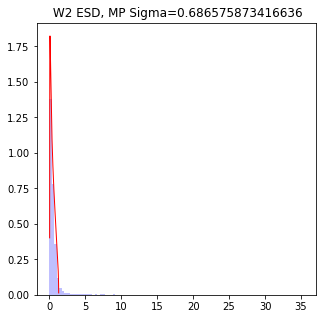

alpha 2.2862915104862016 sigma 0.686575873416636 mp rank 0.03713291331328944 


Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in multiply
  "source": [


% spikes outside bulk 0.00
% sigma 0.5159


RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Util\n",


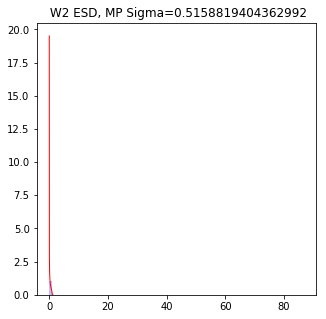

alpha 2.24516056680514 sigma 0.5158819404362992 mp rank 0.012307427530822453 


Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


% spikes outside bulk 0.00
% sigma 0.9867


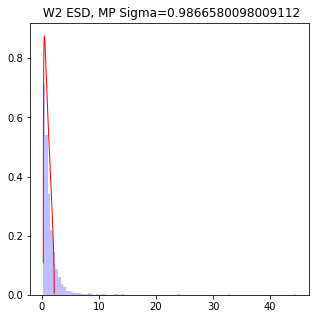

alpha 3.019978299899687 sigma 0.9866580098009112 mp rank 0.04874571582219439 
\hline


In [24]:
for model in [models.alexnet]:
    analyze_model(model, plot=True)

### Generate data for Table

/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [


% spikes outside bulk 0.00
% sigma 0.6866


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


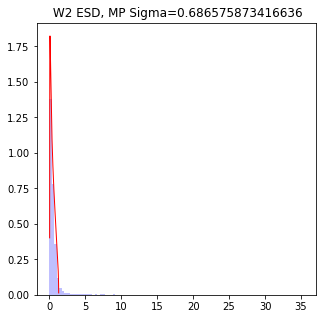

alpha 2.2862915104862016 sigma 0.686575873416636 mp rank 0.03713291331328944 


Assuming nested distributions
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in multiply
  "source": [


% spikes outside bulk 0.00
% sigma 0.5159


RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Util\n",


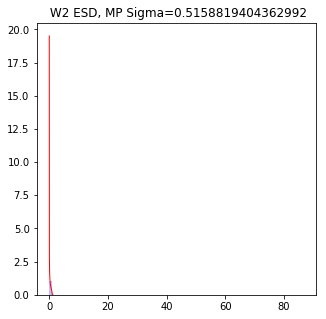

alpha 2.24516056680514 sigma 0.5158819404362992 mp rank 0.012307427530822453 


Assuming nested distributions
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


% spikes outside bulk 0.00
% sigma 0.9867


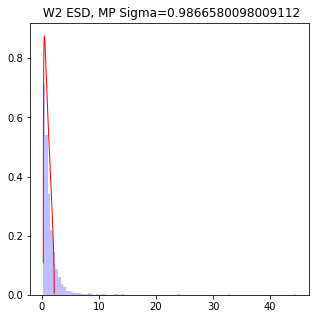

alpha 3.019978299899687 sigma 0.9866580098009112 mp rank 0.04874571582219439 
\hline


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.6269


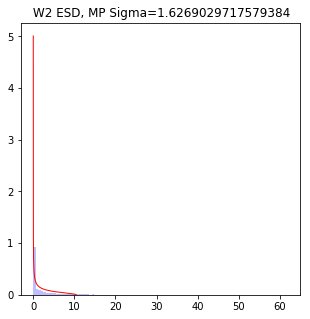

alpha 3.322293154129377 sigma 1.6269029717579384 mp rank 0.16953036187793646 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.0301


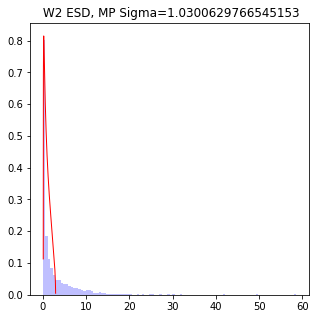

alpha 3.4531724380195508 sigma 1.0300629766545153 mp rank 0.050637747820763086 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9622


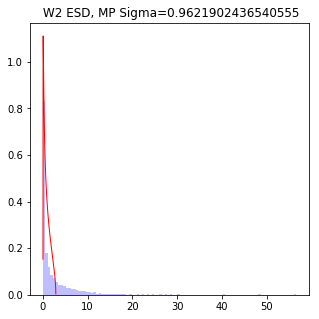

alpha 3.383110141477052 sigma 0.9621902436540555 mp rank 0.05150162194274276 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.1446


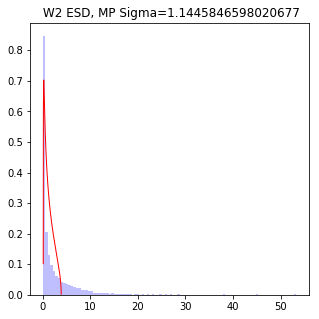

alpha 3.4136170908152175 sigma 1.1445846598020677 mp rank 0.07283760650207641 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.1336


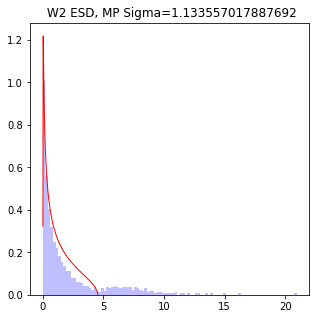

alpha 5.257284462973139 sigma 1.133557017887692 mp rank 0.21625937543998602 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.0237


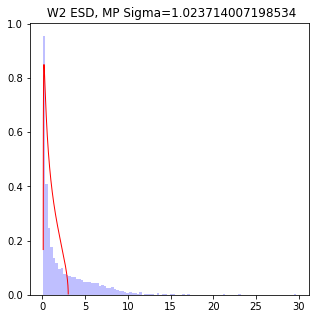

alpha 4.483112529904229 sigma 1.023714007198534 mp rank 0.10178452869635025 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.7839


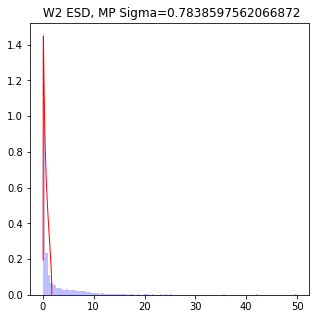

alpha 3.56880358063749 sigma 0.7838597562066872 mp rank 0.035555909826720494 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.7758


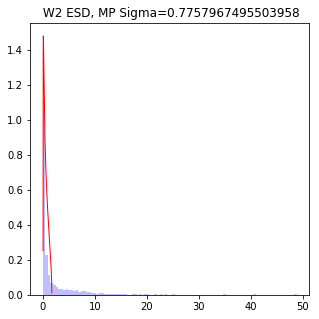

alpha 3.5246031320152675 sigma 0.7757967495503958 mp rank 0.03562443369972632 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.2406


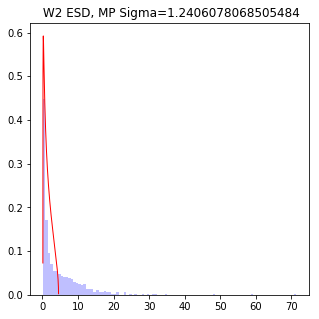

alpha 3.343846587098697 sigma 1.2406078068505484 mp rank 0.06344156585658202 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.1807


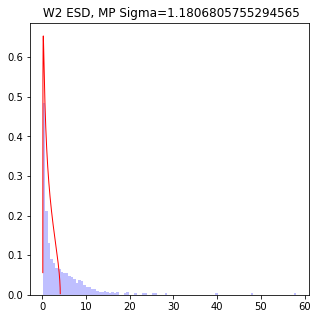

alpha 3.3896752586188823 sigma 1.1806805755294565 mp rank 0.07059748964621179 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.8143


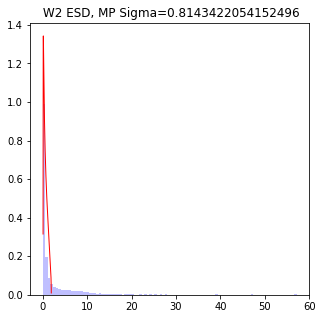

alpha 3.5424350403467453 sigma 0.8143422054152496 mp rank 0.033476509723281464 
\hline
\hline
\hline


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9461


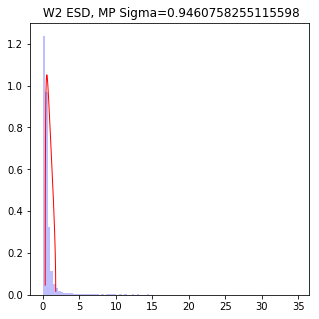

alpha 2.3224900945498117 sigma 0.9460758255115598 mp rank 0.050727529002699626 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.4344


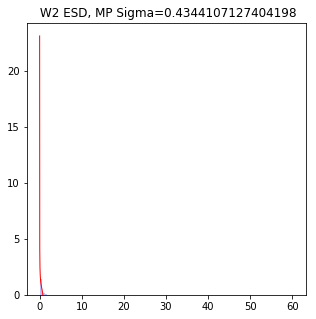

alpha 2.1675133000564113 sigma 0.4344107127404198 mp rank 0.012522728590759927 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9631


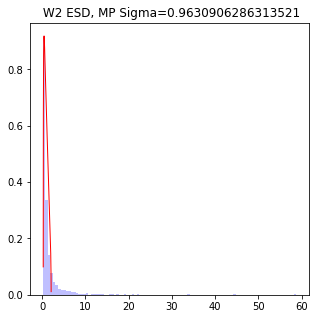

alpha 2.825648919237068 sigma 0.9630906286313521 mp rank 0.03522217970056324 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9770


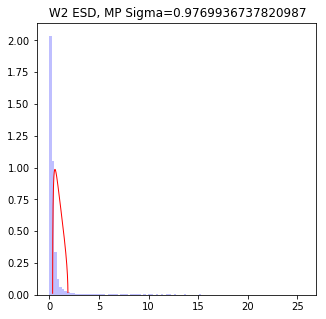

alpha 2.071016776969642 sigma 0.9769936737820987 mp rank 0.07364837159418751 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.3663


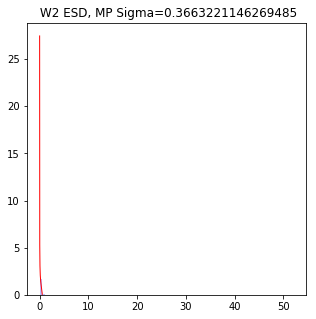

alpha 1.9503550347294425 sigma 0.3663221146269485 mp rank 0.010320859438466922 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9744


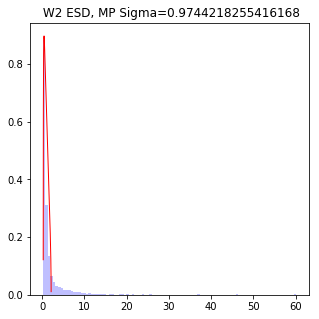

alpha 2.994698444611685 sigma 0.9744218255416168 mp rank 0.03521525202444394 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9846


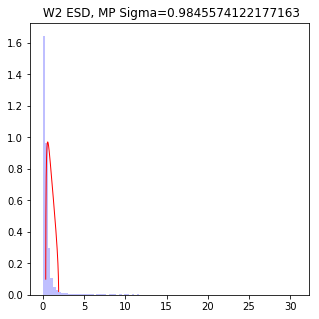

alpha 2.2954872953717222 sigma 0.9845574122177163 mp rank 0.06211509760015707 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.4253


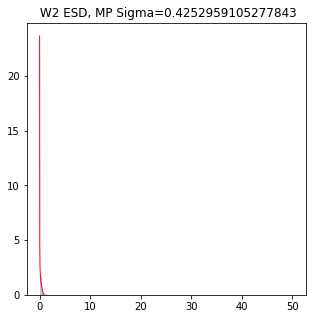

alpha 2.1836780407129215 sigma 0.4252959105277843 mp rank 0.014412379122994059 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9255


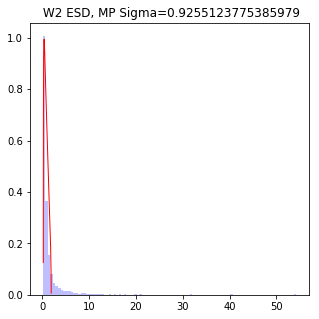

alpha 2.0929850703387234 sigma 0.9255123775385979 mp rank 0.035247014887562614 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.0181


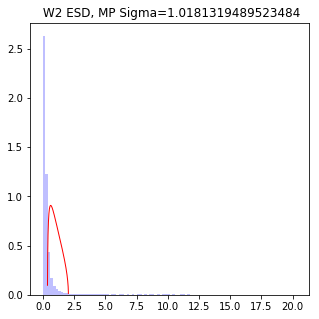

alpha 2.0518788758339292 sigma 1.0181319489523484 mp rank 0.1005735908620919 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.3510


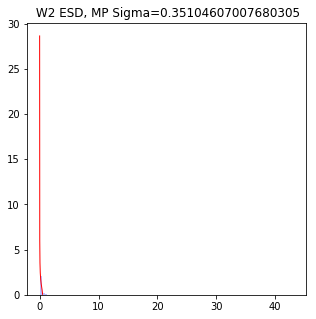

alpha 1.9682982433083938 sigma 0.35104607007680305 mp rank 0.011450561227657044 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9164


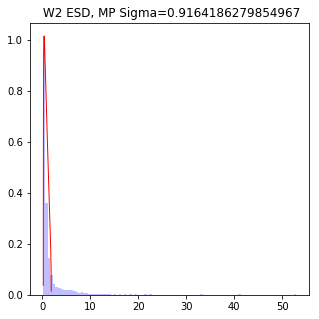

alpha 3.03136745492503 sigma 0.9164186279854967 mp rank 0.035374613598586215 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9918


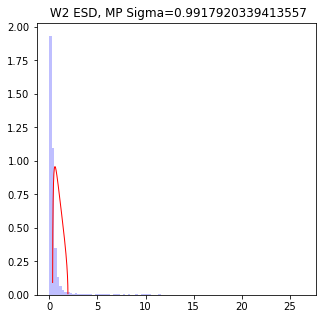

alpha 2.2699649585761215 sigma 0.9917920339413557 mp rank 0.07360569522217723 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.4125


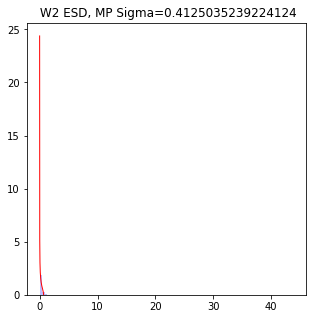

alpha 2.1879228281862684 sigma 0.4125035239224124 mp rank 0.015537102647123432 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9141


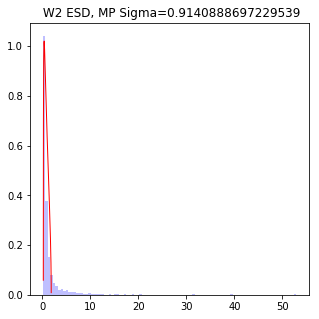

alpha 2.07149483537654 sigma 0.9140888697229539 mp rank 0.03525518778906075 
\hline


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 1.0054


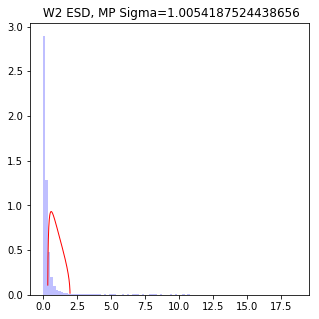

alpha 2.041850378176308 sigma 1.0054187524438656 mp rank 0.1070030927594045 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.3591


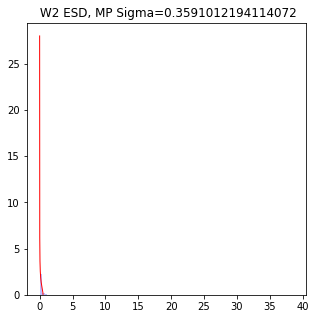

alpha 1.981578133510204 sigma 0.3591012194114072 mp rank 0.01337506161398434 


Assuming nested distributions


% spikes outside bulk 0.00
% sigma 0.9001


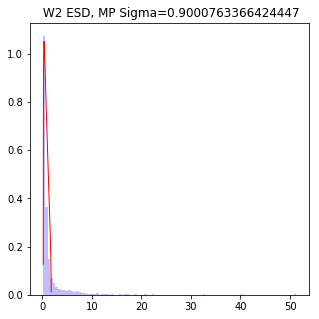

alpha 3.0310940374453157 sigma 0.9000763366424447 mp rank 0.03526564682147478 
\hline


In [25]:
for model in [models.alexnet, 
              models.densenet121, models.densenet161, models.densenet169, models.densenet201, 
              models.inception_v3,
              models.resnet101, models.resnet152, models.resnet18, models.resnet34, models.resnet50, 
              models.squeezenet1_0, models.squeezenet1_1,
              models.vgg11, models.vgg11_bn,
              models.vgg16, models.vgg16_bn,
              models.vgg19, models.vgg19_bn ]:
    #print(model)
    analyze_model(model, plot=True)